In [59]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

img_path = "../images/botellas.tif"

(196, 285)
5
Botellas vacias en la posicion: [[3, 118, 174, 146.0]]


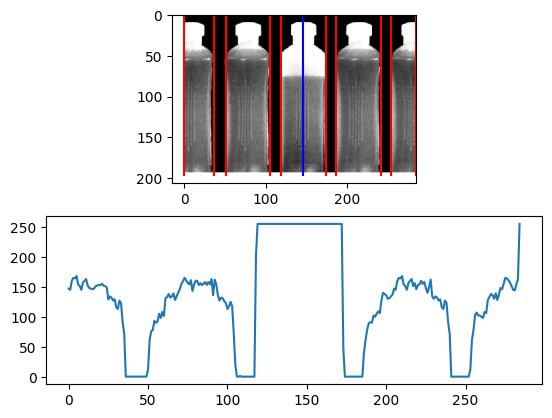

In [60]:
botellas = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)


y = 50
count = 0

botellas_vacias = []
lista_botellas = []

# Cantidad de botellas real: 17

print(botellas.shape)
x_inicio = -1
x_fin= -1
for x in range(1,botellas.shape[1]):
    
    # Caso en que el pixel es el primero de una botella
    if (botellas[y,x] > 20 and botellas[y,x-1] <= 20):
        x_inicio = x
        
    # Caso en que el pixel es el ultimo de una botella o 
    # la imagen termina y todavia hay un pixel que no es negro
    if ((botellas[y,x] <= 20 and botellas[y,x-1] > 20) or \
        (x == botellas.shape[1]-1 and botellas[y,x] > 20)):
        
        x_fin = x
        count += 1
        lista_botellas.append([count,x_inicio,x_fin])
        if (botellas[y,x-2] > 200):
            botellas_vacias.append([count,x_inicio,x_fin,math.floor(x_inicio+x_fin)/2])

print(count)
print("Botellas vacias en la posicion: %s"%botellas_vacias)
# print("Botellas y su posicion: %s"%lista_botellas)

plt.figure()
plt.subplot(2,1,1)
plt.imshow(botellas,cmap="gray")

for i in range(0,len(lista_botellas)):
    for j in range(1,3):
        if j != -1:
            plt.plot([lista_botellas[i][j],lista_botellas[i][j]],[0,botellas.shape[0]],'r')

# for i in range(0,len(botellas_vacias)):
#     for j in range(1,3):
#         if j != -1:
#             plt.plot([botellas_vacias[i][j],botellas_vacias[i][j]],[0,botellas.shape[0]],'b')

for i in range(0,len(botellas_vacias)):
    plt.plot([botellas_vacias[i][3],botellas_vacias[i][3]],[0,botellas.shape[0]],'b')

plt.subplot(2,1,2)
plt.plot(botellas[50,:])

plt.show()

In [ ]:
# contar